In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load data
data = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
prices = data['Close'].values.reshape(-1, 1)

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(prices_scaled))
train_data = prices_scaled[:train_size]
test_data = prices_scaled[train_size:]

In [ ]:
# Define a function to create data sequences for the Bidirectional LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [ ]:
# Create sequences of data for the Bidirectional LSTM model
seq_length = 30
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Define and train the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
77/77 [==============================] - 21s 175ms/step - loss: 0.0057
Epoch 2/50
77/77 [==============================] - 14s 177ms/step - loss: 0.0013
Epoch 3/50
77/77 [==============================] - 14s 178ms/step - loss: 0.0011
Epoch 4/50
77/77 [==============================] - 14s 180ms/step - loss: 0.0010
Epoch 5/50
77/77 [==============================] - 14s 177ms/step - loss: 0.0011
Epoch 6/50
77/77 [==============================] - 14s 177ms/step - loss: 8.4370e-04
Epoch 7/50
77/77 [==============================] - 14s 180ms/step - loss: 8.1284e-04
Epoch 8/50
77/77 [==============================] - 14s 178ms/step - loss: 6.9699e-04
Epoch 9/50
77/77 [==============================] - 14s 177ms/step - loss: 0.0012
Epoch 10/50
77/77 [==============================] - 14s 179ms/step - loss: 7.6318e-04
Epoch 11/50
77/77 [==============================] - 14s 178ms/step - loss: 7.7256e-04
Epoch 12/50
77/77 [==============================] - 14s 179ms/step - loss: 

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

19/19 [==============================] - 2s 60ms/step


In [ ]:
# Inverse scale the predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

In [ ]:
# Print metrics
print('Bidirectional LSTM Model Metrics:')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

Bidirectional LSTM Model Metrics:
Mean Squared Error: 3425114.5016
Root Mean Squared Error: 1850.7065
Mean Absolute Error: 1403.4993
R^2 Score: 0.9827


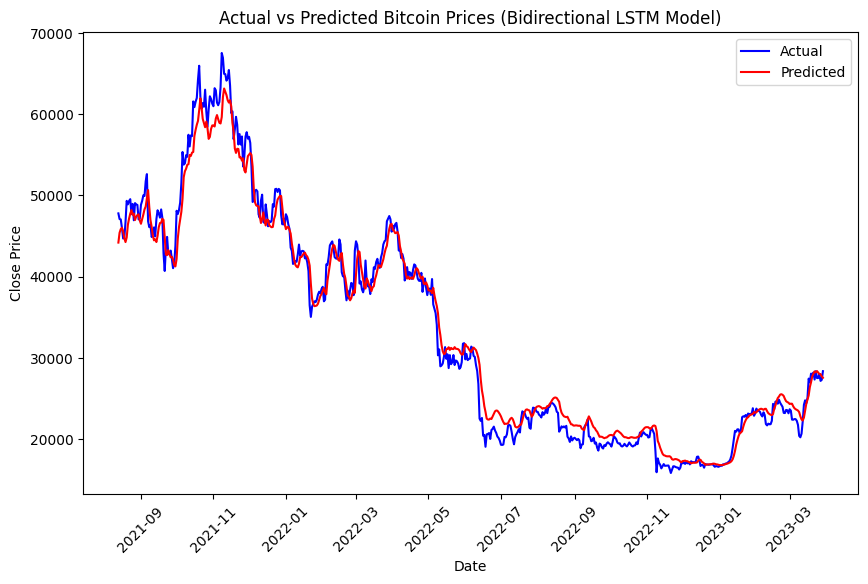

In [ ]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data.index[train_size+seq_length:], y_test_inv, color='blue', label='Actual')
ax.plot(data.index[train_size+seq_length:], y_pred_inv, color='red', label='Predicted')
ax.set_title('Actual vs Predicted Bitcoin Prices (Bidirectional LSTM Model)')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend(loc='best')
plt.xticks(rotation=45)
plt.savefig('BTC-BiLSTM.png')
plt.show()